# Example Hydrology Notebook


#### [National Water Information System: Help System](https://help.waterdata.usgs.gov/) 

In [1]:
#--Import Python Libraries
get_ipython().magic('matplotlib notebook')
import pandas as pd
import numpy as np
from scipy.integrate import trapz, simps
from DataGrabber import *

## Identify Available Gages

In [2]:
#--Enter State Code
state = 'ny'
GotoUSGS(state)


CLICK HERE FOR USGS GAGES: 
 https://waterdata.usgs.gov/nwis/uv?referred_module=sw&state_cd=ny&site_tp_cd=OC&site_tp_cd=OC-CO&site_tp_cd=ES&site_tp_cd=LK&site_tp_cd=ST&site_tp_cd=ST-CA&site_tp_cd=ST-DCH&site_tp_cd=ST-TS&format=station_list

CLICK HERE FOR MAP: 
 https://maps.waterdata.usgs.gov/mapper/index.html


##### Copy Gage ID's From USGS Webpage

In [3]:
#--Enter Selected Gages & Gage Name
Vestal     = '01513500' 
gage_name = 'Vestal'

In [4]:
#--Grab Flow Table
df_q = Get_USGS_Instant(eval(gage_name), flow, start, stop)
df_q.head()
#df_q.plot(grid = True)



Retrieved Data for USGS Gage:  01513500

 SUSQUEHANNA RIVER AT VESTAL NY


qualifiers  StreamFlow
dateTime                                  
1987-10-01 06:23:00        [A]        2750
1987-10-01 07:23:00        [A]        2930
1987-10-01 08:23:00        [A]        2900
1987-10-01 09:23:00        [A]        2880
1987-10-01 10:23:00        [A]        2830


Retrieved Data for USGS Gage:  01513500

 SUSQUEHANNA RIVER AT VESTAL NY


<IPython.core.display.Javascript object>


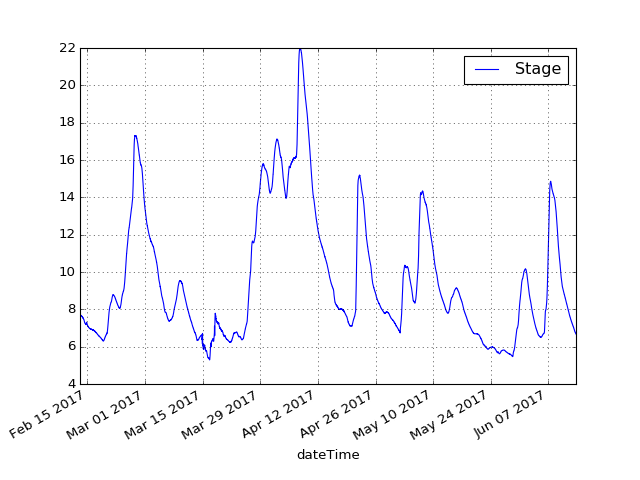

In [5]:
#--Grab Stage Table
df_s = Get_USGS_Instant(eval(gage_name), stage, start, stop)
df_s.plot(grid = True)

<IPython.core.display.Javascript object>


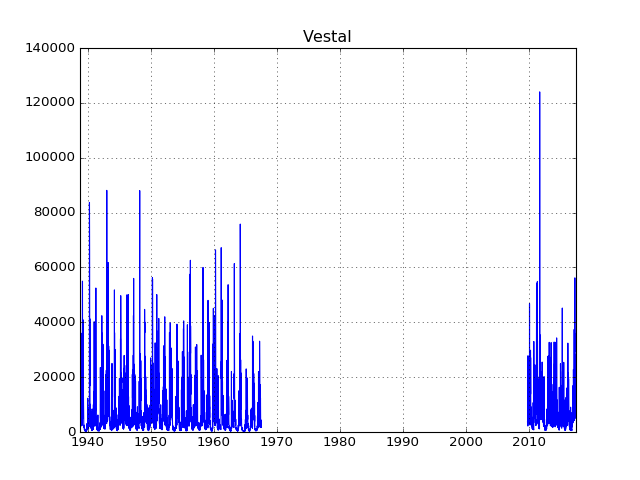

In [6]:
#--Grab Daily 
daily_flow = Get_USGS_Daily(eval(gage_name))
ax1 = plt.subplot(111)
plt.plot(daily_flow.index, np.array(daily_flow))
plt.title(gage_name)
plt.grid()

## Now lets look at the Peak Flows

<IPython.core.display.Javascript object>


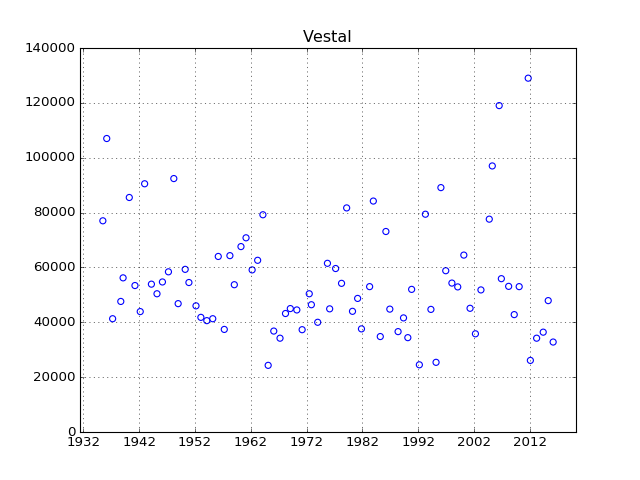

In [8]:
#--Get Peak Flows for Gages of interest
df_p = Get_Peaks(eval(gage_name))
ax1 = plt.subplot(111)
plt.scatter(df_p.index , df_p, color = 'b', marker = 'o', facecolors='none', s=30)
plt.title(gage_name)
plt.grid()

In [28]:
# Take a closer look at the timeseries of the peak events

big_storms = df_p.sort_values(ascending=False)
pd.DataFrame(big_storms).head(7)

peak_va
peak_dt             
2011-09-08  129000.0
2006-06-28  119000.0
1936-03-18  107000.0
2005-04-03   97000.0
1948-03-22   92400.0
1942-12-31   90500.0
1996-01-20   89100.0

Hydrograph for 2011-09-08 00:00:00 from Instantaneous Data


<IPython.core.display.Javascript object>


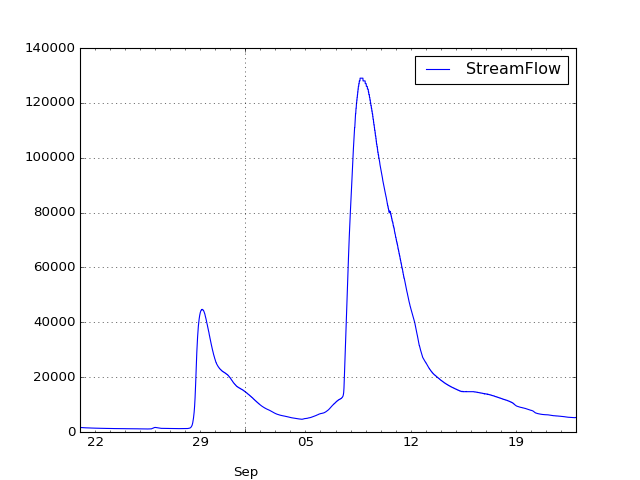

In [36]:
# Hydrographs available for top storms: 0, 1, 3, 6
peak = big_storms.index[0]
start = pd.Timestamp(peak) - pd.Timedelta(days = 18)
stop = pd.Timestamp(peak) + pd.Timedelta(days = 15)
df = df_q.ix[start:stop]
print('Hydrograph for {} from Instantaneous Data'.format(peak))
df.plot(grid='on')

Hydrograph for 2006-06-28 00:00:00 from Instantaneous Data


<IPython.core.display.Javascript object>


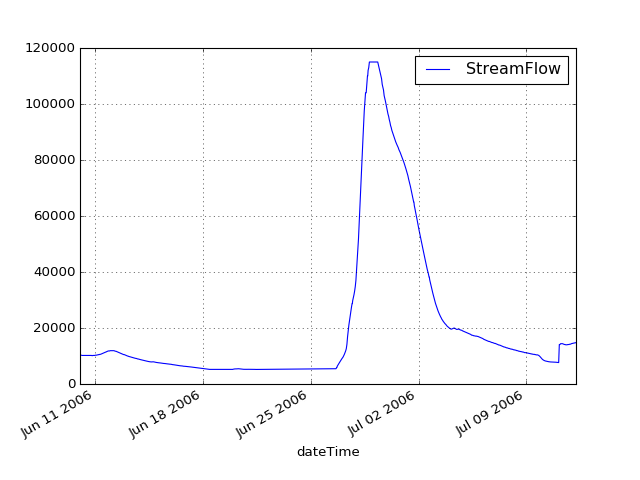

In [30]:
# Hydrographs available for top storms: 0, 1, 3, 6
peak = big_storms.index[1]
start = pd.Timestamp(peak) - pd.Timedelta(days = 18)
stop = pd.Timestamp(peak) + pd.Timedelta(days = 15)
df = df_q.ix[start:stop]
print('Hydrograph for {} from Instantaneous Data'.format(peak))
df.plot(grid='on')

# Daily Means vs Instantaneous Time Series

Hydrograph for 2005-04-03 00:00:00 from Instantaneous Data


<IPython.core.display.Javascript object>


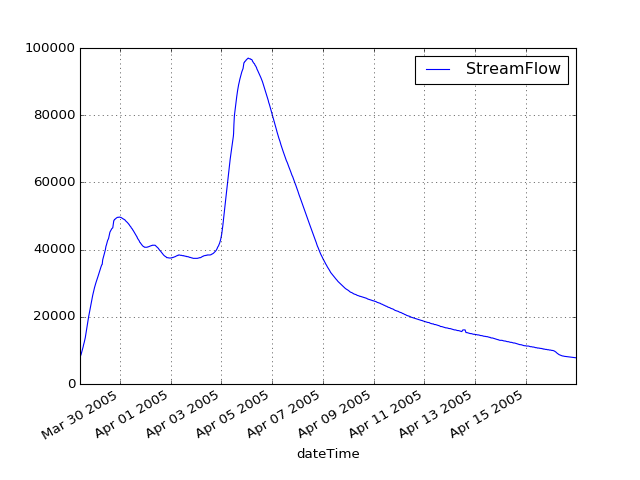

In [31]:
# Hydrographs available for top storms: 0, 1, 3, 6
peak = big_storms.index[3]
start = pd.Timestamp(peak) - pd.Timedelta(days = 20)
stop = pd.Timestamp(peak) + pd.Timedelta(days = 15)
df = df_q.ix[start:stop]
print('Hydrograph for {} from Instantaneous Data'.format(peak))
df.plot(grid='on')

Hydrograph for 1948-03-22 00:00:00 from Daily Mean Data


<IPython.core.display.Javascript object>


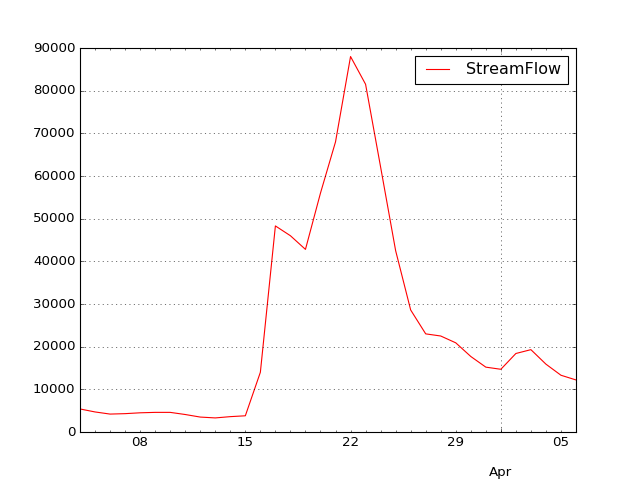

In [29]:
# Hydrographs available for top storms: 0, 1, 3, 6
peak = big_storms.index[4]
start = pd.Timestamp(peak) - pd.Timedelta(days = 18)
stop = pd.Timestamp(peak) + pd.Timedelta(days = 15)
df2 = daily_flow[start:stop]
print('Hydrograph for {} from Daily Mean Data'.format(peak))
df2.plot(color = 'red', grid = 'on')

<IPython.core.display.Javascript object>


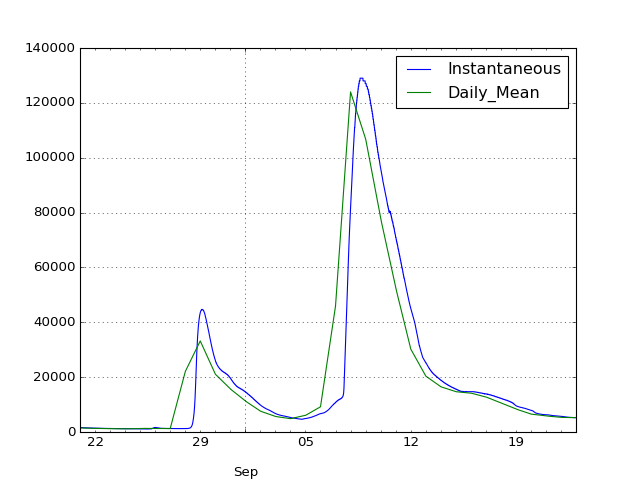

In [11]:
# Hydrographs available for top storms: 0, 1, 3, 6
peak = big_storms.index[0]
start = pd.Timestamp(peak) - pd.Timedelta(days = 18)
stop = pd.Timestamp(peak) + pd.Timedelta(days = 15)
a = df_q.ix[start:stop]
b = daily_flow[start:stop]
df = pd.merge(a , b, how='outer', left_index=True, right_index=True)
df.rename(columns = {'StreamFlow_x':'Instantaneous', 'StreamFlow_y':'Daily_Mean'}, inplace=True)
df['Daily_Mean'] = df['Daily_Mean'].interpolate()
df.plot(grid='on')

# How close are they?
    What are the error bounds....

<IPython.core.display.Javascript object>


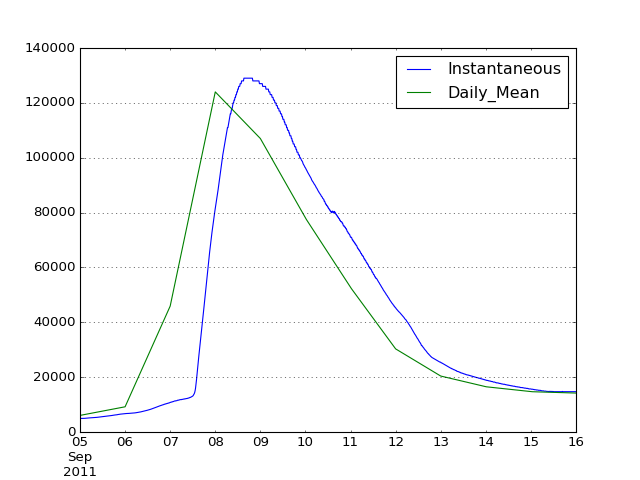

Volume calculated using Instantaneous Observations = 48247953.0
Volume from Daily Mean Observations = 48846240.0

Using Daily means yields = 598287.0 more Cubic Feet of Water
(Daily means add ~ 1.2400249654804114% more flow)


In [34]:
# Hydrographs available for top storms: 0, 1, 3, 6
peak = big_storms.index[0]
start = pd.Timestamp(peak) - pd.Timedelta(days = 3)
stop = pd.Timestamp(peak) + pd.Timedelta(days = 8)

a = df_q.ix[start:stop]
b = daily_flow[start:stop]
df = pd.merge(a , b, how='outer', left_index=True, right_index=True)
df.rename(columns = {'StreamFlow_x':'Instantaneous', 'StreamFlow_y':'Daily_Mean'}, inplace=True)
df['Daily_Mean'] = df['Daily_Mean'].interpolate()
df.plot(grid='on')

inst_volume, daily_volume = simps(np.array(df['Instantaneous'])), simps(np.array(df['Daily_Mean']))
print('Volume calculated using Instantaneous Observations = {}'.format(round(inst_volume,0)))
print('Volume from Daily Mean Observations = {}'.format(round(daily_volume,0)))
print('\nUsing Daily means yields = {} more Cubic Feet of Water'.format(round(daily_volume-inst_volume),0))
print('(Daily means add ~ {}% more flow)'.format(100*(daily_volume-inst_volume)/inst_volume))


### Because it's easy, lets try a different integration approach

In [35]:
# Trapezoidal
inst_volume, daily_volume = trapz(np.array(df['Instantaneous'])), trapz(np.array(df['Daily_Mean']))
print('Volume calculated using Instantaneous Observations = {}'.format(round(inst_volume,0)))
print('Volume from Daily Mean Observations = {}'.format(round(daily_volume,0)))
print('\nUsing Daily means yields = {} more Cubic Feet of Water'.format(round(daily_volume-inst_volume),0))
print('(Daily means add ~ {}% more flow)\n\n\n'.format(100*(daily_volume-inst_volume)/inst_volume))

Volume calculated using Instantaneous Observations = 48248730.0
Volume from Daily Mean Observations = 48846240.0

Using Daily means yields = 597510.0 more Cubic Feet of Water
(Daily means add ~ 1.238395290404535% more flow)





#### What's Next: 
    1. Find Current 100yr Flow using PeakFlow
    2. Bring in HEC-RAS Return Periods
    3. Add stretching for return period analysis
    4. Add interpolating to compate daily vs instantaneous 
    5. Add wier flow converter and hydrogaph builder